In [12]:
import kagglehub

path = kagglehub.dataset_download("somesh24/spambase")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spambase


1.Load the dataset

In [13]:
import pandas as pd

file_path = '/kaggle/input/spambase/spambase_csv.csv'

try:
    df = pd.read_csv(file_path, header=None, skiprows=1)
    print("Dataset loaded")
    print("First 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"file was not found at '{file_path}'")
    print("Please check the path .")

Dataset loaded
First 5 rows:
     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


1.1 preprocess the dataset


In [14]:
print("Missing values per column:")
print(df.isnull().sum())

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1]) # except last col
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df.iloc[:, -1]  # last column target (spam/ham)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Missing values per column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64
Shape of X: (4601, 57)
Shape of y: (4601,)


 2: Perform EDA

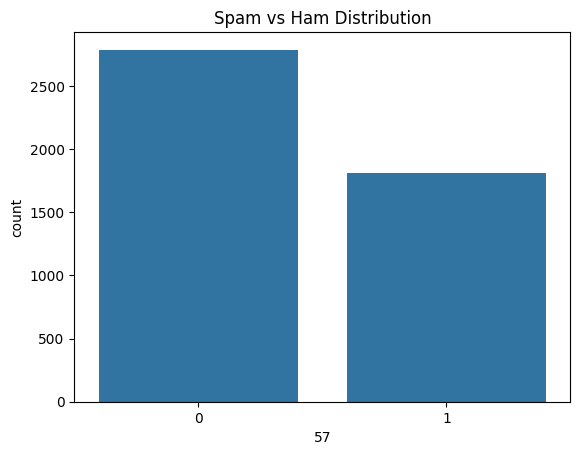

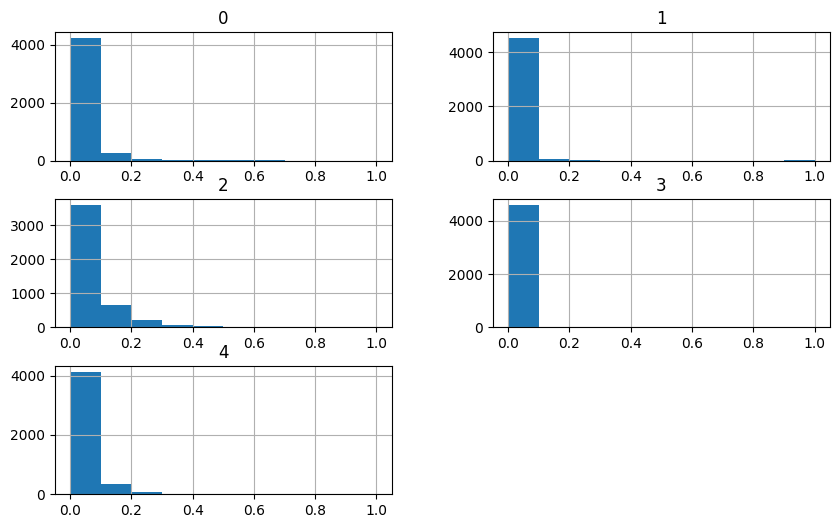

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(x=y)
plt.title("Spam vs Ham Distribution")
plt.show()

# Quick feature distribution for first 5 features
X.iloc[:, :5].hist(figsize=(10,6))
plt.show()


3: Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3680, 57)
Testing data shape: (921, 57)


4: Train All Required Models

In [17]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# 1. NAIVE BAYES MODELS

nb_gaussian = GaussianNB().fit(X_train, y_train)
nb_multinomial = MultinomialNB().fit(X_train, y_train)
nb_bernoulli = BernoulliNB().fit(X_train, y_train)

print("Naive Bayes models trained: Gaussian, Multinomial, Bernoulli")


# 2. KNN MODELS
#    Vary k values & use KDTree and BallTree algorithms

k_values = [1, 3, 5, 7]
knn_models = {}

for k in k_values:
    for algo in ['kd_tree', 'ball_tree']:  # Two tree algorithms
        knn = KNeighborsClassifier(n_neighbors=k, algorithm=algo)
        knn.fit(X_train, y_train)
        knn_models[f"KNN_k={k}_{algo}"] = knn

print(f"KNN models trained for k={k_values} with KDTree and BallTree")


# 3. SUPPORT VECTOR MACHINE (SVM)

svm_kernels = {
    'linear': SVC(kernel='linear', random_state=42),
    'poly': SVC(kernel='poly', degree=3, gamma='scale', random_state=42),
    'rbf': SVC(kernel='rbf', gamma='scale', random_state=42),
    'sigmoid': SVC(kernel='sigmoid', gamma='scale', random_state=42)
}

svm_models = {}

for kernel, model in svm_kernels.items():
    model.fit(X_train, y_train)
    svm_models[f"SVM_{kernel}"] = model

print("SVM models trained: Linear, Polynomial, RBF, Sigmoid")

print("\n All models for Step 4 trained successfully.")


Naive Bayes models trained: Gaussian, Multinomial, Bernoulli
KNN models trained for k=[1, 3, 5, 7] with KDTree and BallTree
SVM models trained: Linear, Polynomial, RBF, Sigmoid

 All models for Step 4 trained successfully.


5: Evaluate Models


Model: GaussianNB
Accuracy: 0.8328
Precision: 0.7146
Recall: 0.9587
F1-score: 0.8188


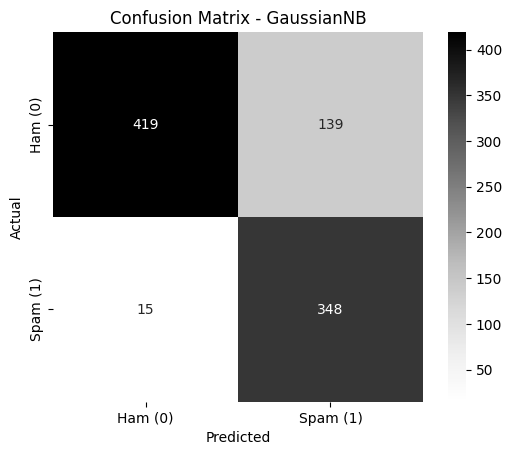


Model: MultinomialNB
Accuracy: 0.8936
Precision: 0.9431
Recall: 0.7769
F1-score: 0.8520


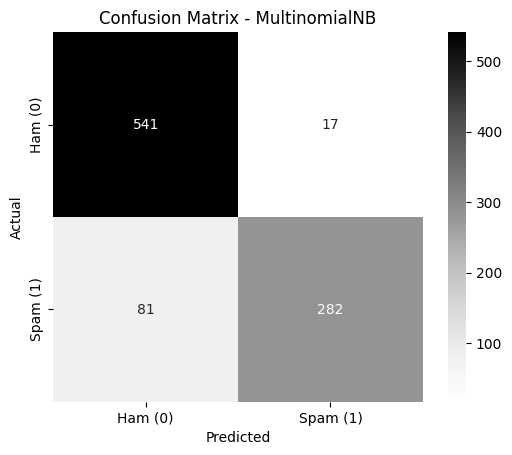


Model: BernoulliNB
Accuracy: 0.8795
Precision: 0.8684
Recall: 0.8182
F1-score: 0.8426


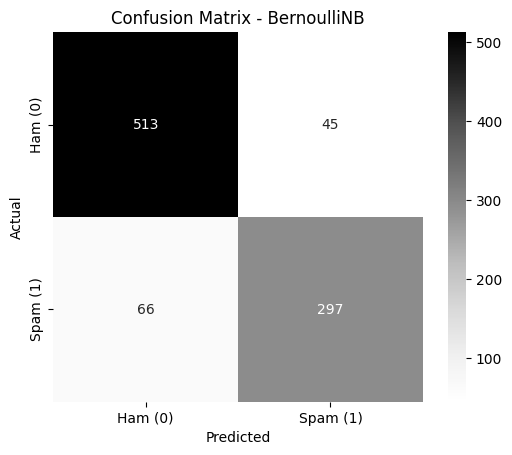


Model: KNN_k=1_kd_tree
Accuracy: 0.8958
Precision: 0.8678
Recall: 0.8678
F1-score: 0.8678


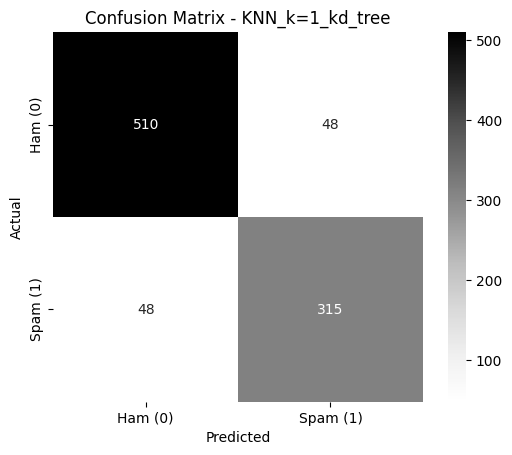


Model: KNN_k=1_ball_tree
Accuracy: 0.8958
Precision: 0.8678
Recall: 0.8678
F1-score: 0.8678


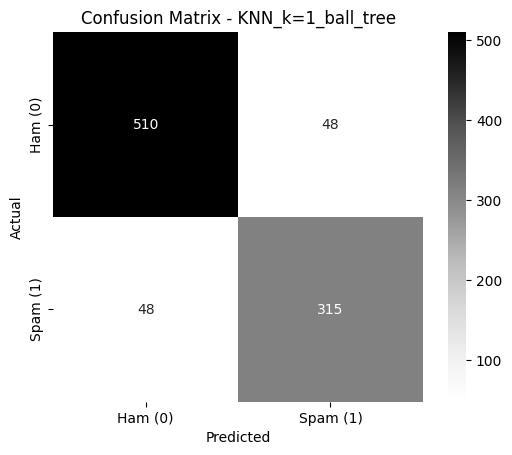


Model: KNN_k=3_kd_tree
Accuracy: 0.8958
Precision: 0.8825
Recall: 0.8485
F1-score: 0.8652


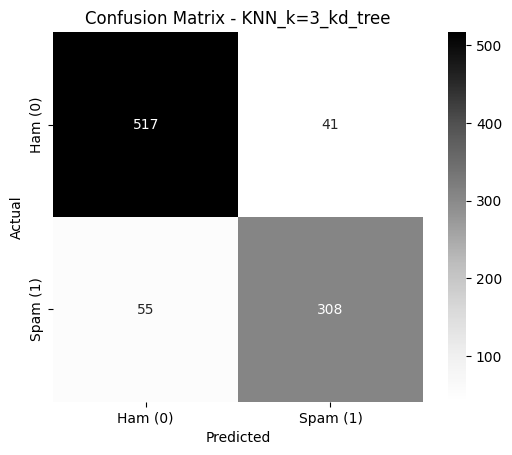


Model: KNN_k=3_ball_tree
Accuracy: 0.8958
Precision: 0.8825
Recall: 0.8485
F1-score: 0.8652


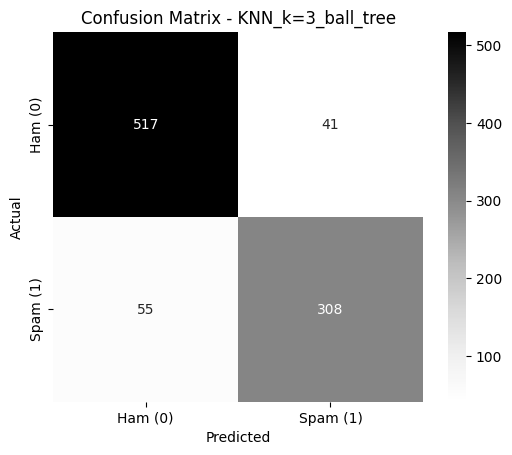


Model: KNN_k=5_kd_tree
Accuracy: 0.9023
Precision: 0.8760
Recall: 0.8760
F1-score: 0.8760


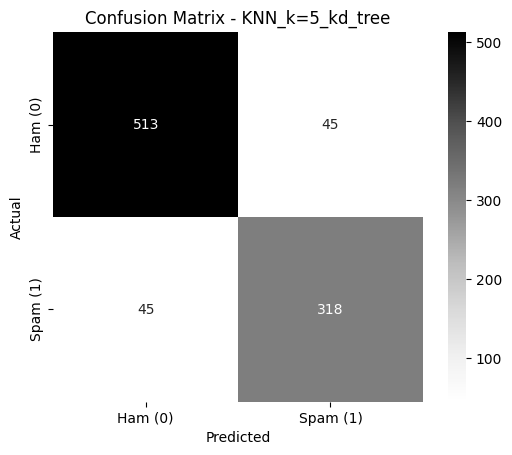


Model: KNN_k=5_ball_tree
Accuracy: 0.9023
Precision: 0.8760
Recall: 0.8760
F1-score: 0.8760


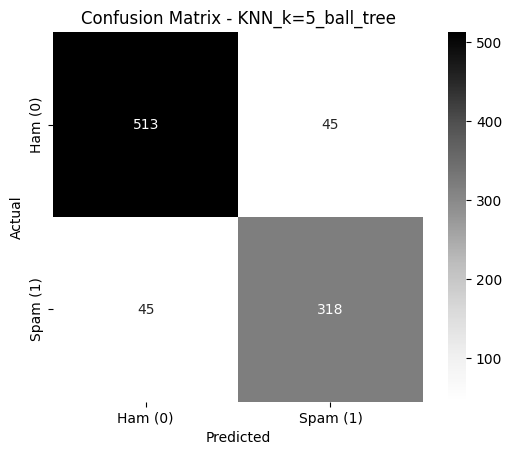


Model: KNN_k=7_kd_tree
Accuracy: 0.8958
Precision: 0.8761
Recall: 0.8567
F1-score: 0.8663


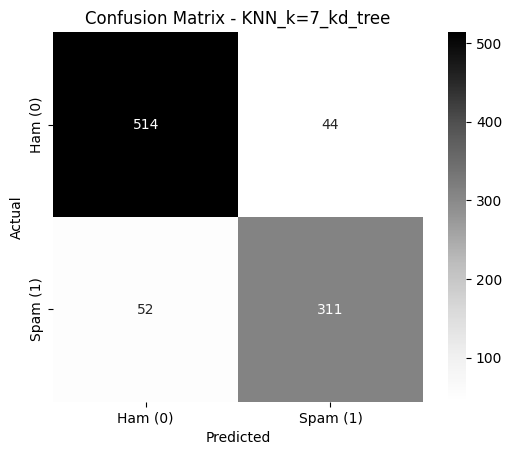


Model: KNN_k=7_ball_tree
Accuracy: 0.8958
Precision: 0.8761
Recall: 0.8567
F1-score: 0.8663


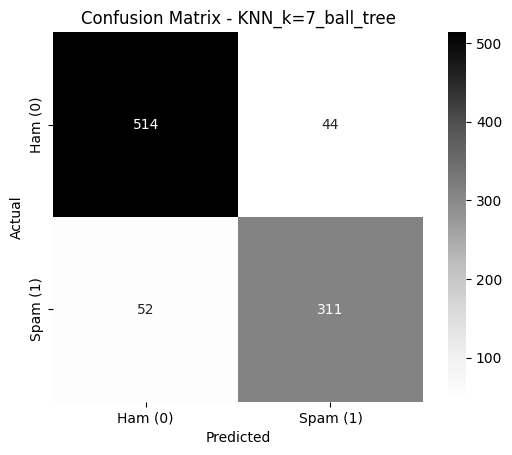


Model: SVM_linear
Accuracy: 0.8979
Precision: 0.9039
Recall: 0.8292
F1-score: 0.8649


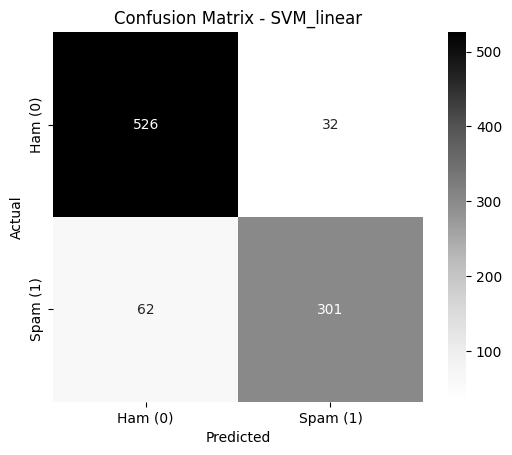


Model: SVM_poly
Accuracy: 0.8502
Precision: 0.9310
Recall: 0.6694
F1-score: 0.7788


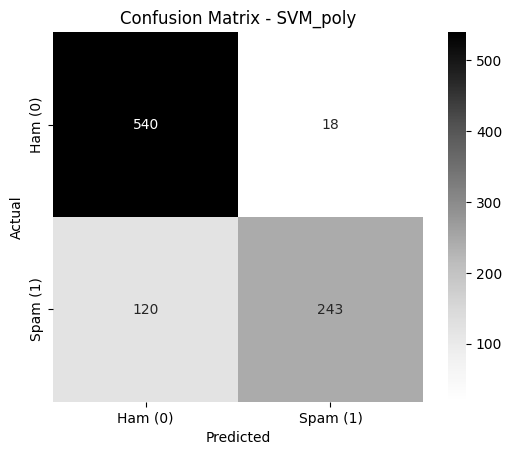


Model: SVM_rbf
Accuracy: 0.9218
Precision: 0.9193
Recall: 0.8788
F1-score: 0.8986


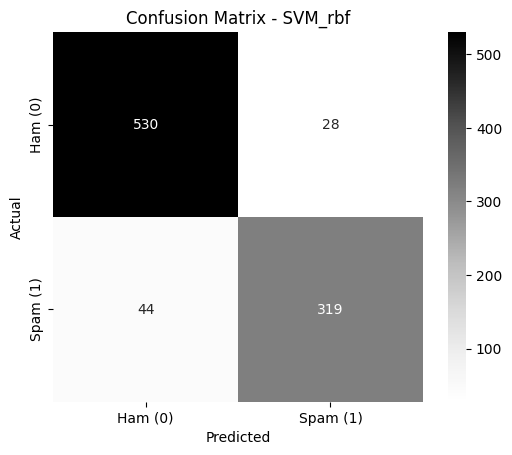


Model: SVM_sigmoid
Accuracy: 0.7959
Precision: 0.7566
Recall: 0.7107
F1-score: 0.7330


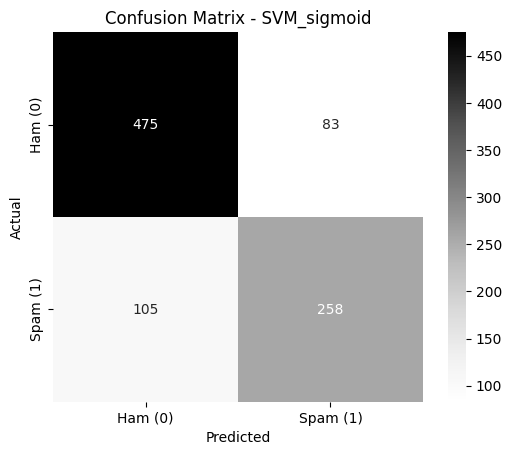

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    labels = ['Ham (0)', 'Spam (1)']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
                xticklabels=labels, yticklabels=labels,
                cbar=True, square=True)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, prec, rec, f1


results = {}

# 1. Evaluate Naive Bayes
for name, model in zip(["GaussianNB","MultinomialNB","BernoulliNB"],
                       [nb_gaussian, nb_multinomial, nb_bernoulli]):
    results[name] = evaluate_model(model, X_test, y_test, name)

# 2. Evaluate KNN
for name, model in knn_models.items():
    results[name] = evaluate_model(model, X_test, y_test, name)

# 3. Evaluate SVM
for name, model in svm_models.items():
    results[name] = evaluate_model(model, X_test, y_test, name)


ROC Curves for Models

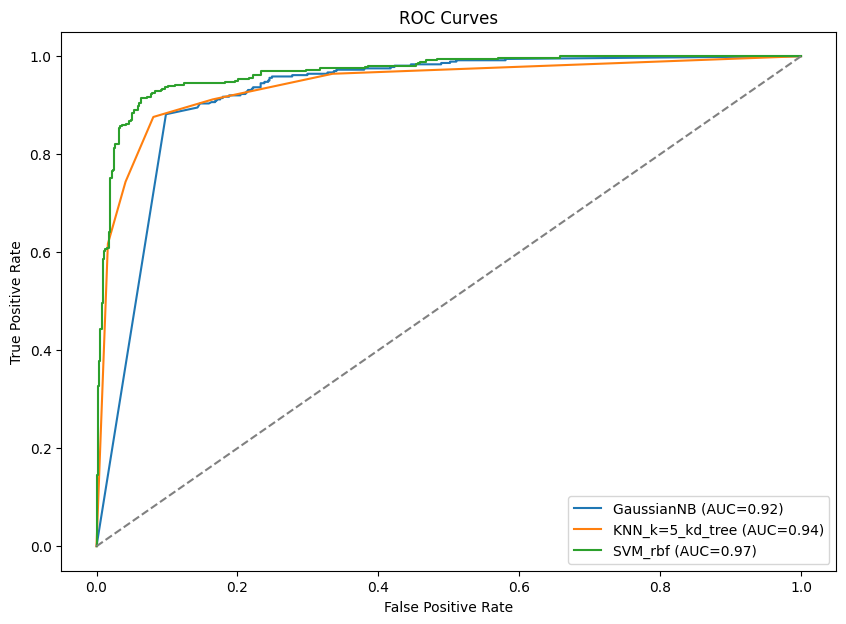

In [19]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

plt.figure(figsize=(10,7))


selected_models = {
    'GaussianNB': nb_gaussian,
    'KNN_k=5_kd_tree': knn_models['KNN_k=5_kd_tree'],
    'SVM_rbf': svm_models['SVM_rbf']
}

for name, model in selected_models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        # For SVM without probability, use decision_function
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()